# Operational Chroma Scan

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1

## Function declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [30]:
def line(x, a, b):
    return a * x + b

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

# Load output data

In [10]:
num_sims = 15
dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ddo = dict()

ddo = add_input_file(ddo, '01_01/output/output.mat', round_sig(dps[0]))
ddo = add_input_file(ddo, '01_02/output/output.mat', round_sig(dps[1]))
ddo = add_input_file(ddo, '01_03/output/output.mat', round_sig(dps[2]))
ddo = add_input_file(ddo, '01_04/output/output.mat', round_sig(dps[3]))
ddo = add_input_file(ddo, '01_05/output/output.mat', round_sig(dps[4]))
ddo = add_input_file(ddo, '01_06/output/output.mat', round_sig(dps[5]))
ddo = add_input_file(ddo, '01_07/output/output.mat', round_sig(dps[6]))
ddo = add_input_file(ddo, '01_08/output/output.mat', dps[7])
ddo = add_input_file(ddo, '01_09/output/output.mat', round_sig(dps[8]))
ddo = add_input_file(ddo, '01_10/output/output.mat', round_sig(dps[9]))
ddo = add_input_file(ddo, '01_11/output/output.mat', round_sig(dps[10]))
ddo = add_input_file(ddo, '01_12/output/output.mat', round_sig(dps[11]))
ddo = add_input_file(ddo, '01_13/output/output.mat', round_sig(dps[12]))
ddo = add_input_file(ddo, '01_14/output/output.mat', round_sig(dps[13]))
ddo = add_input_file(ddo, '01_15/output/output.mat', round_sig(dps[14]))

	Added output data from  01_01/output/output.mat 	 dictionary key:  -0.0025
	Added output data from  01_02/output/output.mat 	 dictionary key:  -0.0021
	Added output data from  01_03/output/output.mat 	 dictionary key:  -0.0018
	Added output data from  01_04/output/output.mat 	 dictionary key:  -0.0014
	Added output data from  01_05/output/output.mat 	 dictionary key:  -0.0011
	Added output data from  01_06/output/output.mat 	 dictionary key:  -0.00071
	Added output data from  01_07/output/output.mat 	 dictionary key:  -0.00036
	Added output data from  01_08/output/output.mat 	 dictionary key:  0.0
	Added output data from  01_09/output/output.mat 	 dictionary key:  0.00036
	Added output data from  01_10/output/output.mat 	 dictionary key:  0.00071
	Added output data from  01_11/output/output.mat 	 dictionary key:  0.0011
	Added output data from  01_12/output/output.mat 	 dictionary key:  0.0014
	Added output data from  01_13/output/output.mat 	 dictionary key:  0.0018
	Added output dat

# Plot and name parameters etc

In [11]:
save_folder = 'Plots/Operational/0/'
CO_offset = '0'

sc = 'NoSC'
legend_label = r'$\frac{\delta p}{p_0}$'
main_label = 'OP_Chroma'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 30
zoom_turns = 15
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [12]:
ddo[0].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

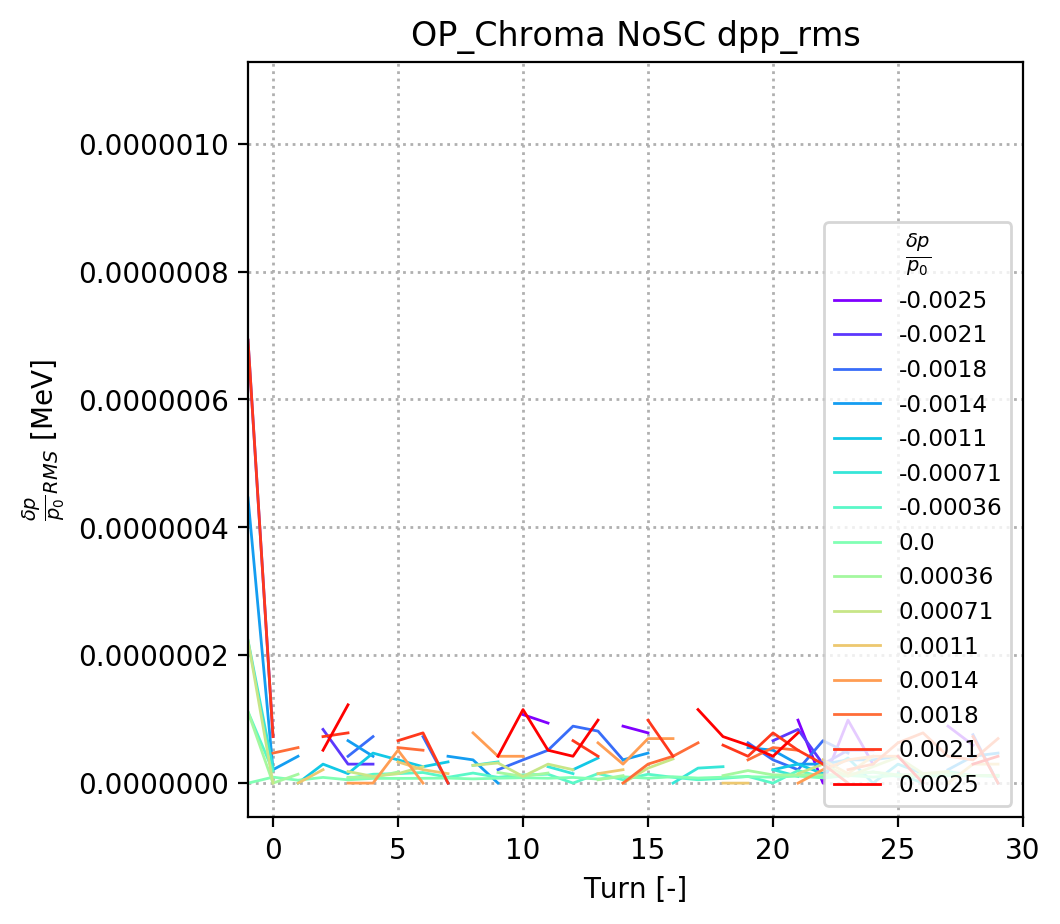

In [13]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p_0}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], ddo[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot);
#ax1.set_ylim(0.82, 0.87);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

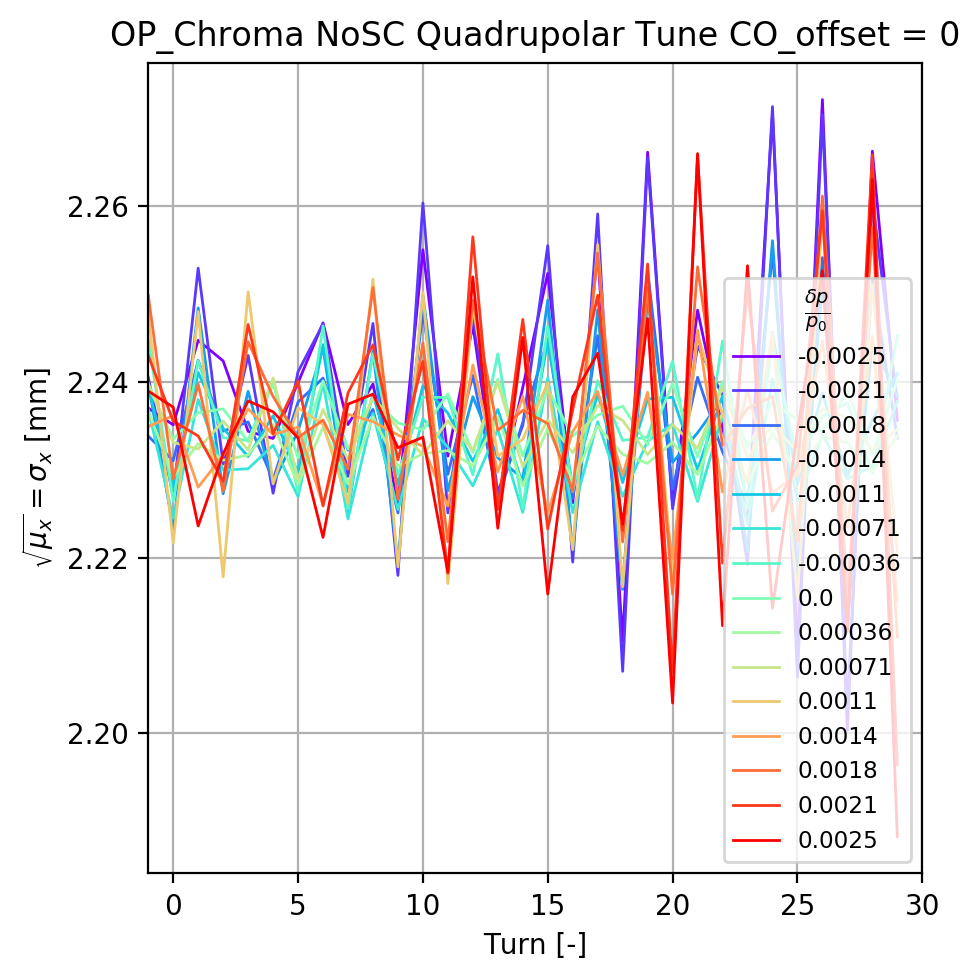

In [14]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' Quadrupolar Tune CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):
        ax1.plot(ddo[key]['turn'][0], np.sqrt(ddo[key][parameter][0])*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30)

savename = save_folder + 'sig_x.png'
plt.tight_layout()
#plt.savefig(savename, dpi = 800);

# Save frequencies using different methods

In [15]:
qx_harmonic = []
qy_harmonic = []

qx_fft = []
qy_fft = []

qx_naff = []
qy_naff = []


 Momentum Offset =  -0.0025
 Offset =  2.239069675161233  mm
 Amplitude =  0.03586668534371472  mm
 Frequency =  0.225
 Phase offset =  0.3792304335281981

 Momentum Offset =  -0.0021
 Offset =  2.238153848319124  mm
 Amplitude =  0.034261930718744664  mm
 Frequency =  0.2255
 Phase offset =  0.36473344001320074

 Momentum Offset =  -0.0018
 Offset =  2.235304574170132  mm
 Amplitude =  0.02148765290751107  mm
 Frequency =  0.2233
 Phase offset =  0.410044103871191

 Momentum Offset =  -0.0014
 Offset =  2.234867606746375  mm
 Amplitude =  0.019832666324567254  mm
 Frequency =  0.2247
 Phase offset =  0.3663248251838497

 Momentum Offset =  -0.0011
 Offset =  2.234903174718124  mm
 Amplitude =  0.009658272507964381  mm
 Frequency =  0.2222
 Phase offset =  0.39659314302871146

 Momentum Offset =  -0.00071
 Offset =  2.23172068509265  mm
 Amplitude =  0.008295180256784175  mm
 Frequency =  0.2237
 Phase offset =  0.3549253132841957

 Momentum Offset =  -0.00036
 Offset =  2.23598975966

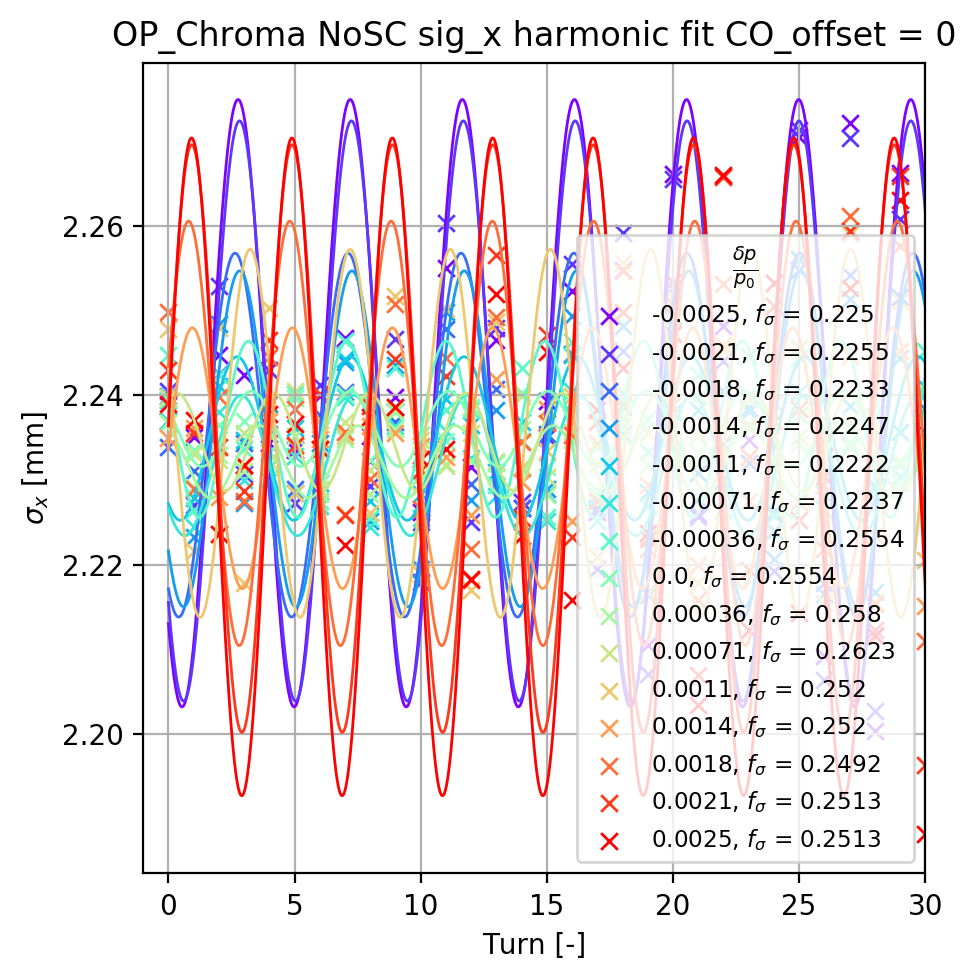

In [16]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)    
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.0
    freq_max = 0.49

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  2.971574557108749  mm
 Amplitude =  0.01829090484924058  mm
 Frequency =  0.1869
 Phase offset =  0.19502720266079324

 Momentum Offset =  -0.0021
 Offset =  2.9759817102320447  mm
 Amplitude =  0.01896296363272727  mm
 Frequency =  0.1873
 Phase offset =  0.18649818353723704

 Momentum Offset =  -0.0018
 Offset =  2.9842061797476127  mm
 Amplitude =  0.02058939083253558  mm
 Frequency =  0.1873
 Phase offset =  0.17493182641690413

 Momentum Offset =  -0.0014
 Offset =  2.9786986324418616  mm
 Amplitude =  0.014068557272945773  mm
 Frequency =  0.187
 Phase offset =  0.18404017181183005

 Momentum Offset =  -0.0011
 Offset =  2.9785697849550132  mm
 Amplitude =  0.013820398998246556  mm
 Frequency =  0.2052
 Phase offset =  0.24263975262151238

 Momentum Offset =  -0.00071
 Offset =  2.978977687182162  mm
 Amplitude =  0.014705296381191321  mm
 Frequency =  0.2045
 Phase offset =  0.19199807659429208

 Momentum Offset =  -0.00036
 Offset =  2.97

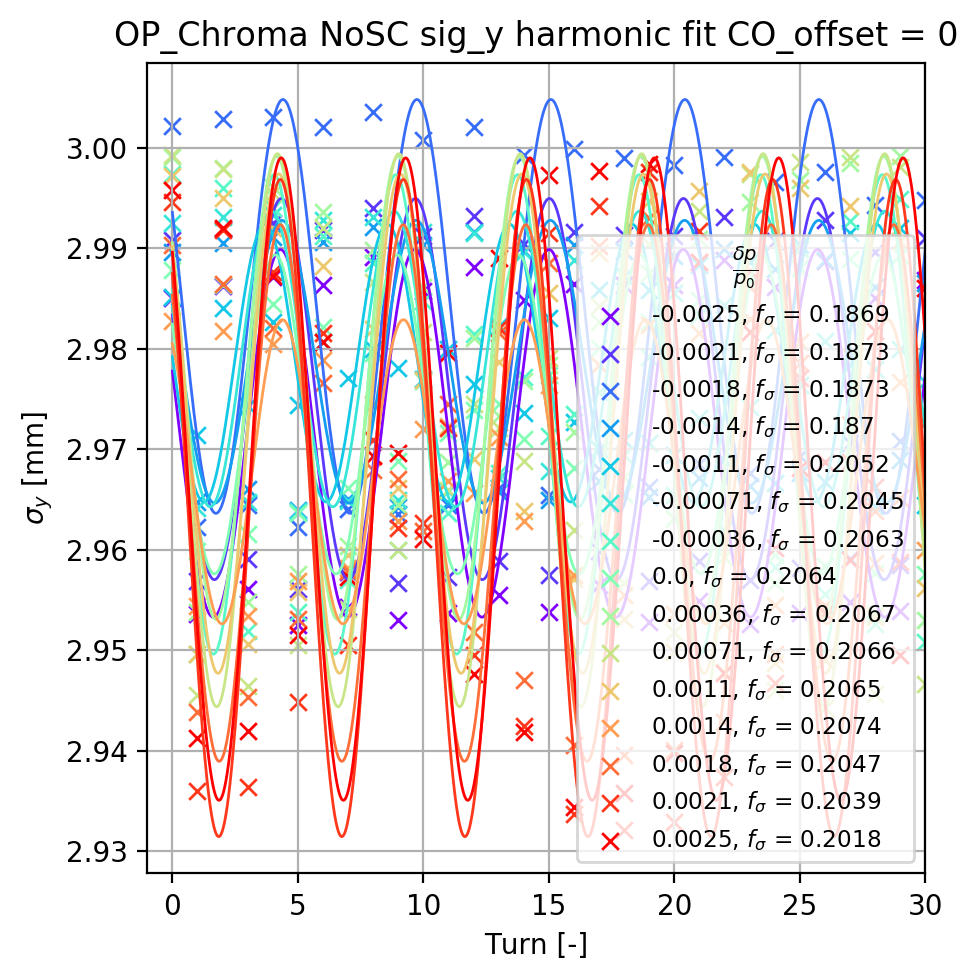

In [17]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.15001
    freq_max = 0.2499

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    #qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_quadrupolar_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  -6.572005422559831  mm
 Amplitude =  5.886272264008992  mm
 Frequency =  0.2172
 Phase offset =  0.007564927413070784

 Momentum Offset =  -0.0021
 Offset =  -5.723616318276376  mm
 Amplitude =  5.045184494861172  mm
 Frequency =  0.2173
 Phase offset =  0.00789701318939116

 Momentum Offset =  -0.0018
 Offset =  -4.8755711249470055  mm
 Amplitude =  4.173182938140383  mm
 Frequency =  0.2174
 Phase offset =  0.007340203846213068

 Momentum Offset =  -0.0014
 Offset =  -4.0280408915722585  mm
 Amplitude =  3.342271824812471  mm
 Frequency =  0.2176
 Phase offset =  0.0068929970259858295

 Momentum Offset =  -0.0011
 Offset =  -3.1809361632591866  mm
 Amplitude =  2.495308153264115  mm
 Frequency =  0.2177
 Phase offset =  0.006738845635273619

 Momentum Offset =  -0.00071
 Offset =  -2.334309966420234  mm
 Amplitude =  1.6589411708756565  mm
 Frequency =  0.2179
 Phase offset =  0.006117794108266219

 Momentum Offset =  -0.00036
 Offset =  -1.488

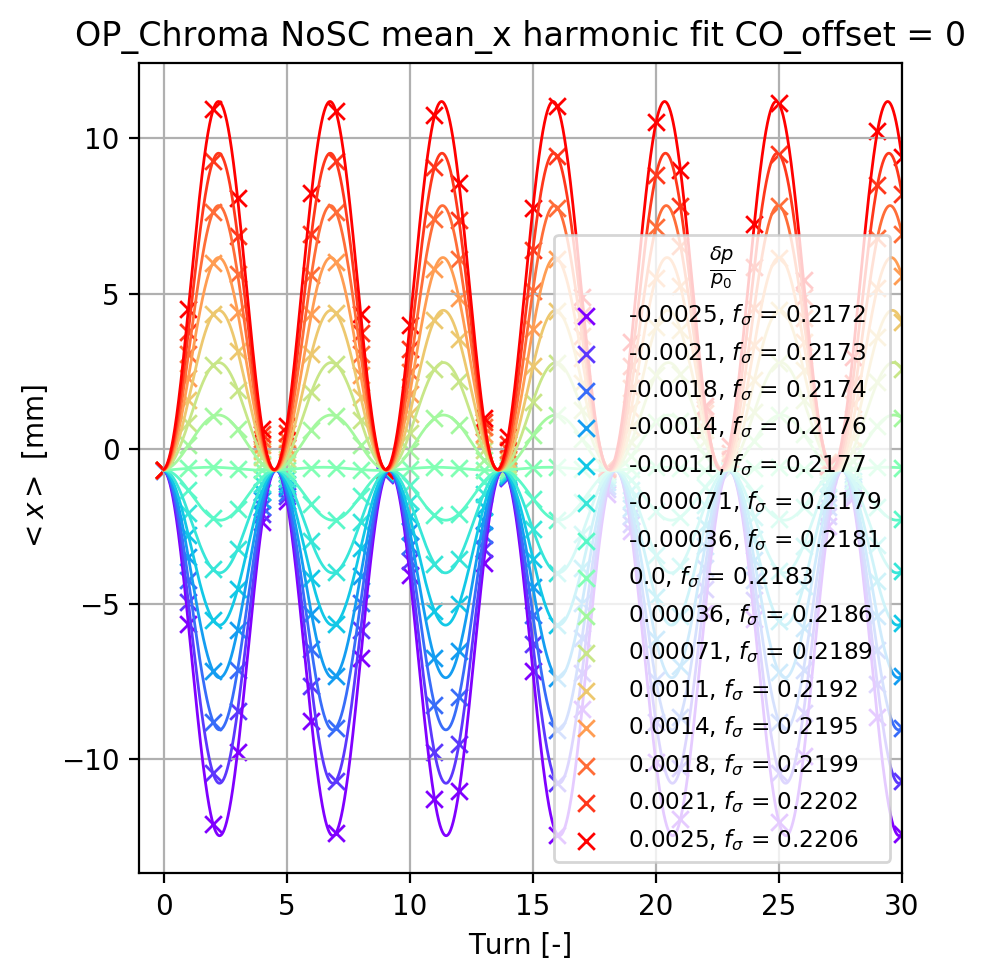

In [18]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.149
    freq_max = 0.249

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qx_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qx_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);


 Momentum Offset =  -0.0025
 Offset =  -0.00010798437663298481  mm
 Amplitude =  0.012068280003852199  mm
 Frequency =  0.2499
 Phase offset =  0.081731789453745

 Momentum Offset =  -0.0021
 Offset =  0.0003137415487612868  mm
 Amplitude =  0.017933096824927542  mm
 Frequency =  0.249
 Phase offset =  -0.2633845470289543

 Momentum Offset =  -0.0018
 Offset =  -3.3595797957038315e-05  mm
 Amplitude =  0.0059290751241385786  mm
 Frequency =  0.2479
 Phase offset =  0.07870436310481972

 Momentum Offset =  -0.0014
 Offset =  -0.00010719672068664458  mm
 Amplitude =  0.005680001874692948  mm
 Frequency =  0.2468
 Phase offset =  0.22878495891236864

 Momentum Offset =  -0.0011
 Offset =  -0.0002174751384259882  mm
 Amplitude =  0.010176239903366894  mm
 Frequency =  0.2459
 Phase offset =  0.31411106916302495

 Momentum Offset =  -0.00071
 Offset =  -0.00014050644475954748  mm
 Amplitude =  0.012323802290582764  mm
 Frequency =  0.2448
 Phase offset =  0.4937071065973731

 Momentum Offs

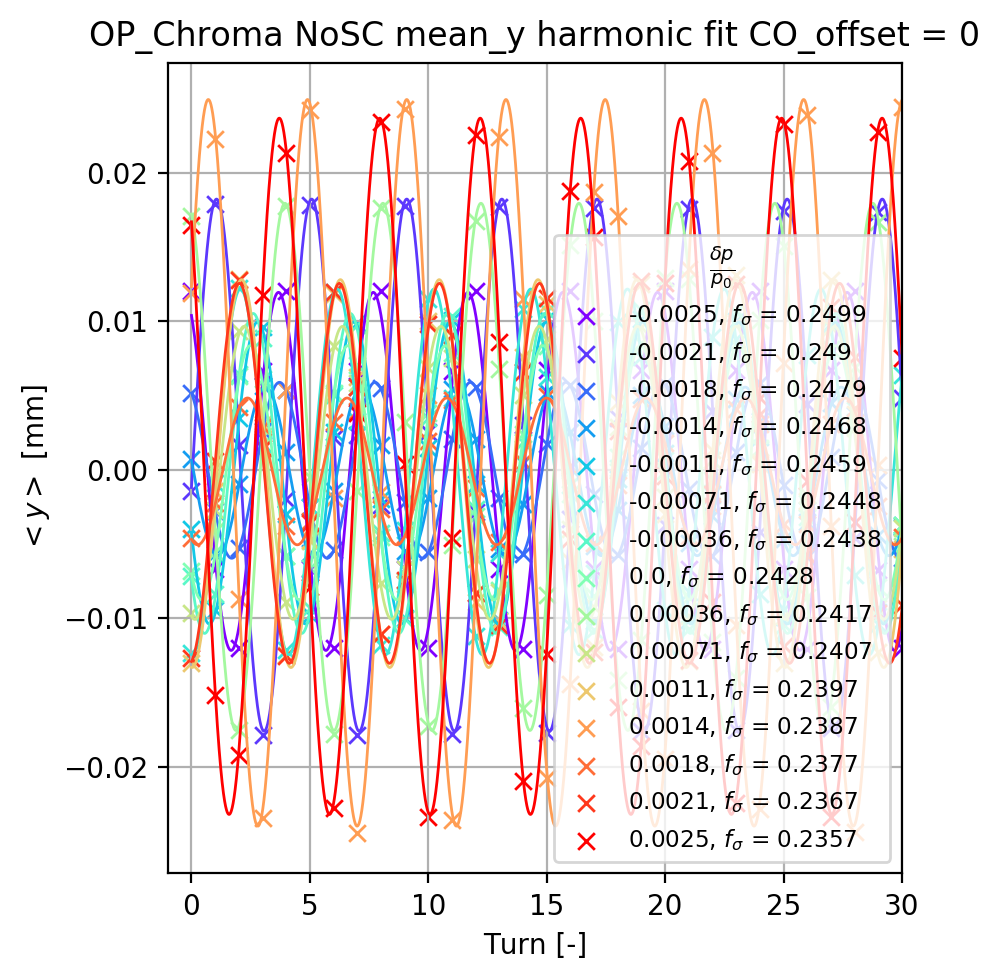

In [19]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit CO_offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)
y_fine = np.array(range(0, 30000))*0.001
#print y_fine

for key, value in sorted(ddo.iteritems()):
#key=0

    y = np.array(range(0, 31))
    x = np.array(ddo[key][parameter][0]*1E3)

    mean_x = np.mean(x)
    if mean_x < 0.0 :
        offset_min = 1.5 * np.mean(x)
        offset_max = 0.5 * np.mean(x)
    else:
        offset_min = 0.5 * np.mean(x)
        offset_max = 1.5 * np.mean(x)    

    amp_min = 0.5 * 0.999 * (np.max(x) - np.min(x))
    amp_max = 0.5 * 1.001 * (np.max(x) - np.min(x))

    freq_min = 0.2249
    freq_max = 0.2499

    popt, pcov = curve_fit(harmonic_fn, ddo[key]['turn'][0]+1, x, method = 'trf', bounds =((offset_min,amp_min,-np.inf,freq_min),(offset_max,amp_max,np.inf,freq_max)))

    print '\n Momentum Offset = ', key
    print ' Offset = ', popt[0], ' mm'
    print ' Amplitude = ', popt[1], ' mm'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)

    ax1.plot(y_fine, harmonic_fn(y_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
    lab_ = str(str(key) + r', $f_{\sigma}$ = ' + str(round(popt[3],4)))
    ax1.scatter(ddo[key]['turn'][0]+1, x, label=lab_, color=colors[c_it], marker='x');
    c_it = c_it + 1
    
    qy_harmonic.append(popt[3])
        
ax1.legend(fontsize='small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,30);
#ax1.set_ylim(-2,2);

savename = save_folder + 'qy_harmonic.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

/usr/lib64/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


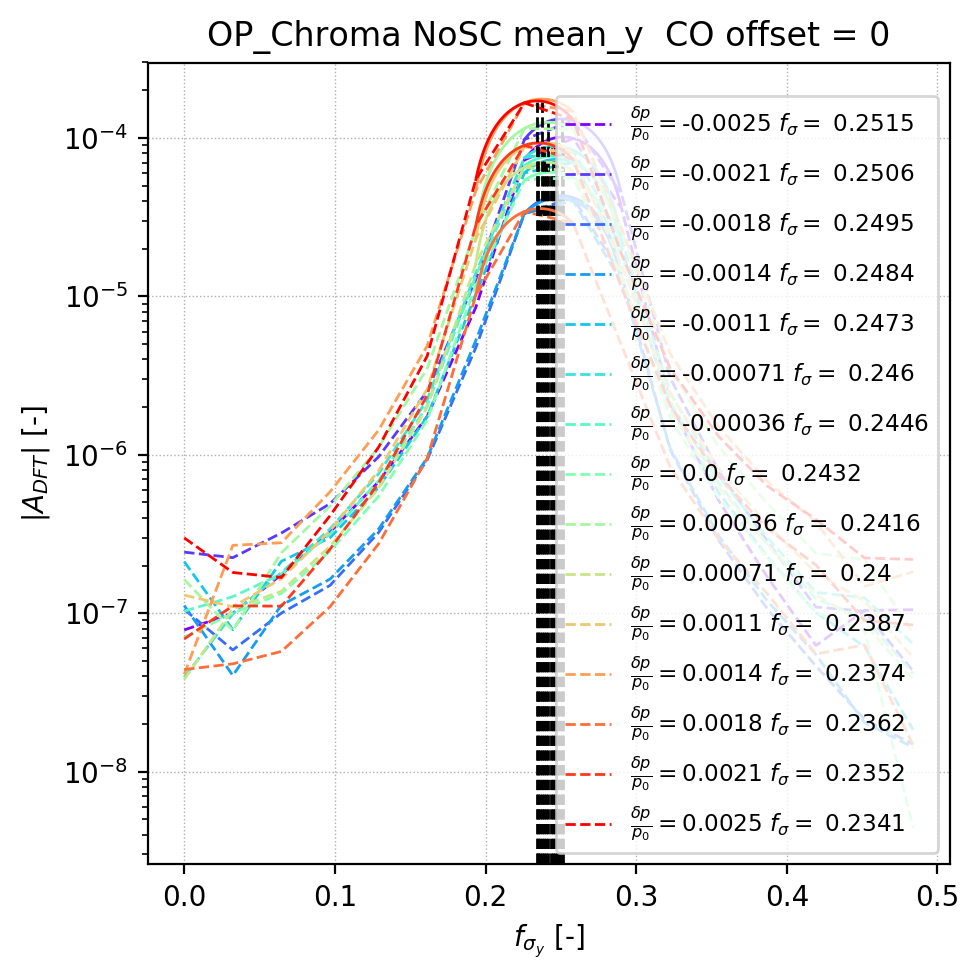

In [20]:
# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' mean_y  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{y}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_y'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_y.append(f_max)
    qy_fft.append(f_max)
    
ax1.legend(loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'y_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

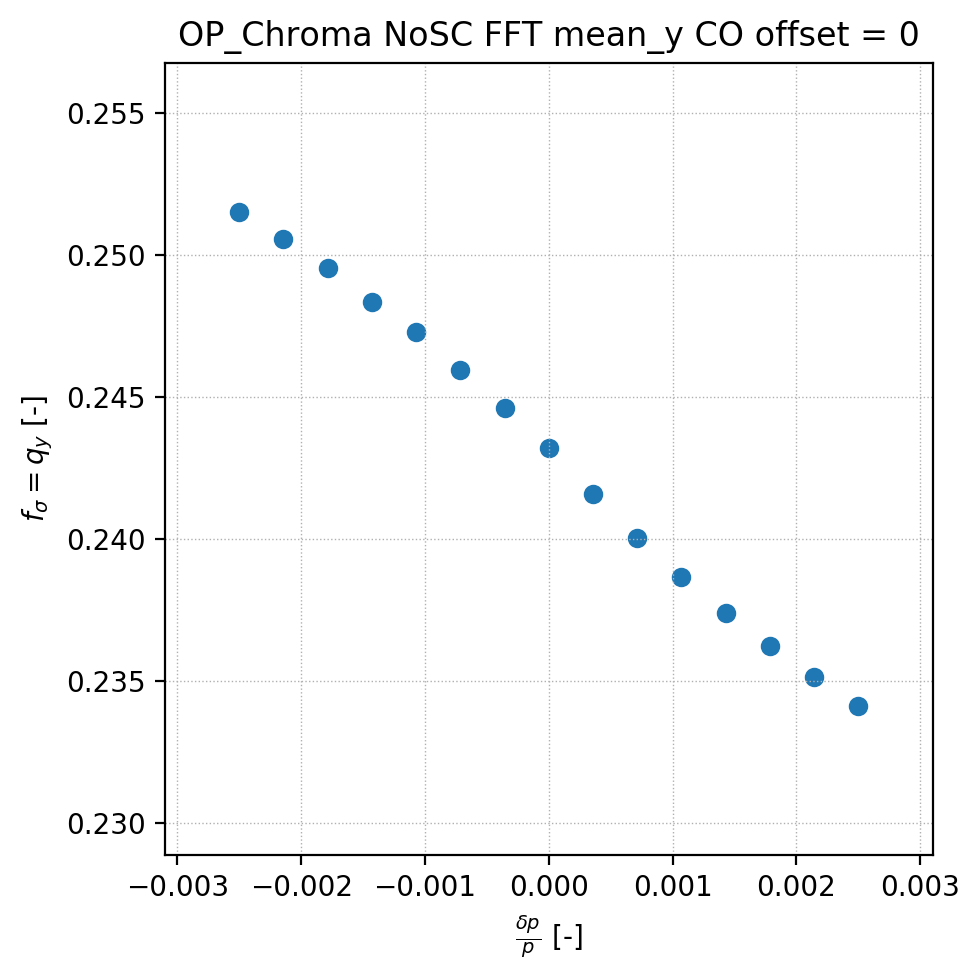

In [21]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_y CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ax1.scatter(dps, f_sig_y);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

savename = save_folder + 'qy.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

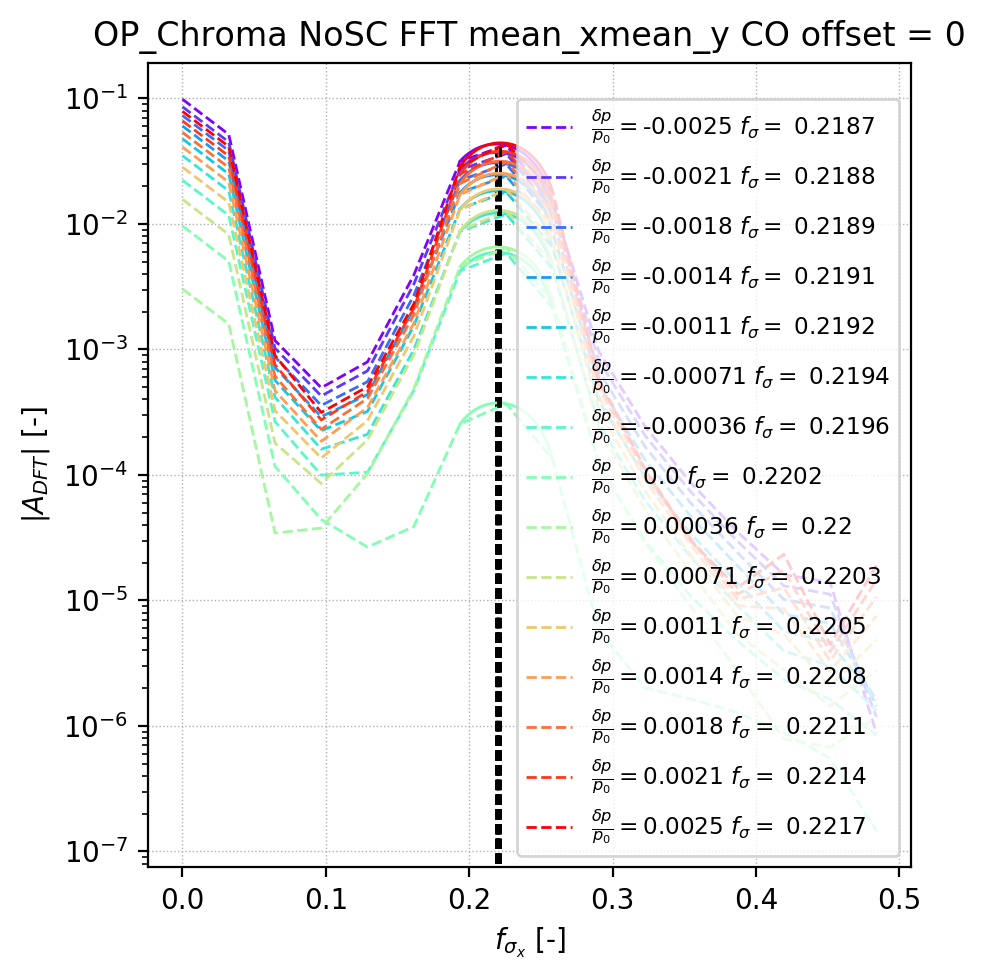

In [22]:
# Store envelope oscillation frequencies
f_sig_x = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' FFT mean_x' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 31

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):

    ampl_h = np.abs(np.fft.rfft(ddo[key]['mean_x'][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='--')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it])
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    f_sig_x.append(f_max)
    qx_fft.append(f_max)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'x_fft.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

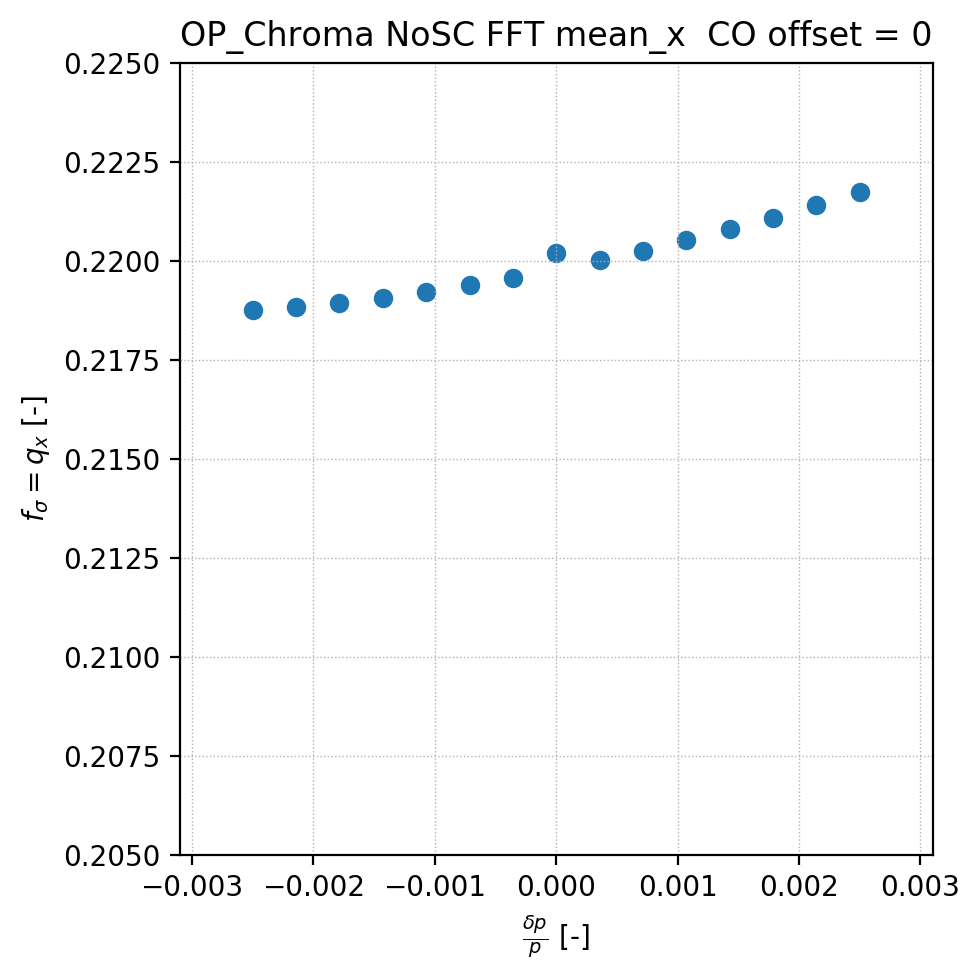

In [23]:
fig1 = plt.figure(facecolor='w', edgecolor='k');
ax1 = fig1.add_subplot(111);

tit = main_label + ' ' + sc + ' FFT mean_x  CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)
ax1.scatter(dps, f_sig_x);
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
ax1.set_ylim(0.205, 0.225);

savename = save_folder + 'qx.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Calculate tunes using NAFF

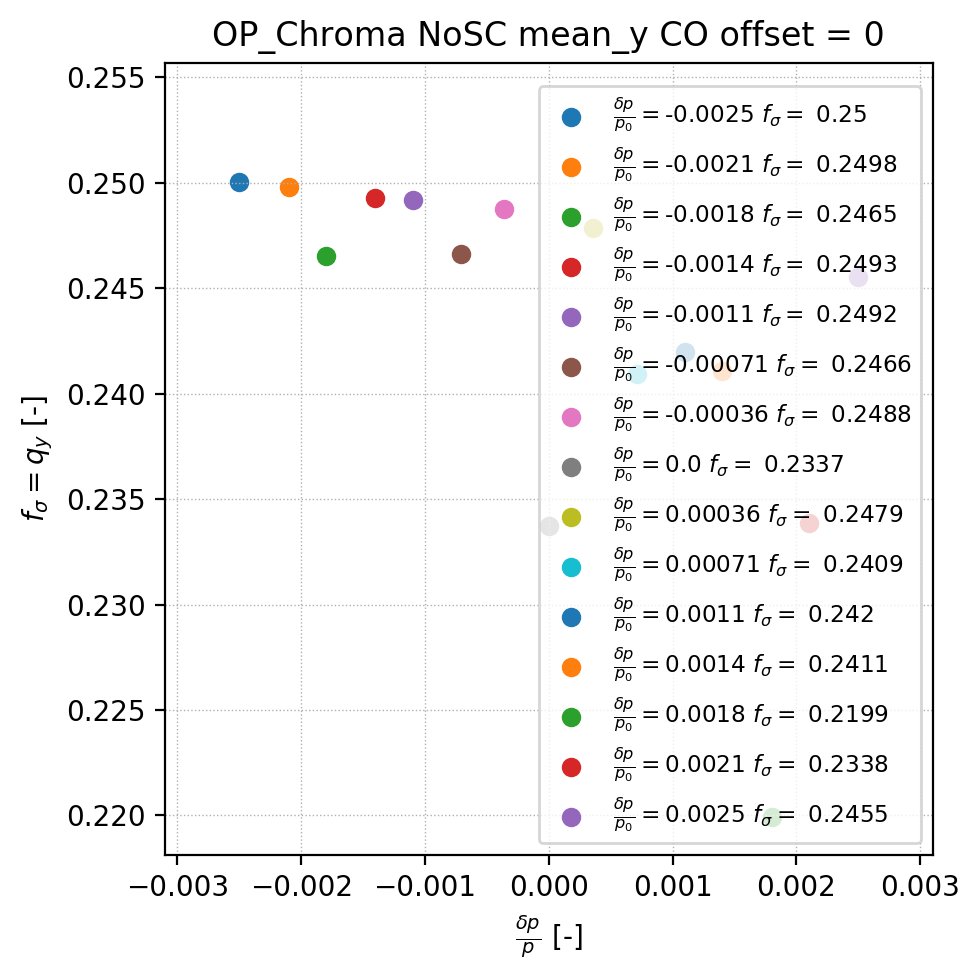

In [24]:
parameter = 'mean_y'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.215, 0.245);

skiptrns= 4
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        if key == 0.0: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.001: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.002: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        elif key == 0.003: 
            skiptrns = 3
            N_turns = 31 - skiptrns
        #print skiptrns
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 

        
    f_sig_x.append(freq)
    qy_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

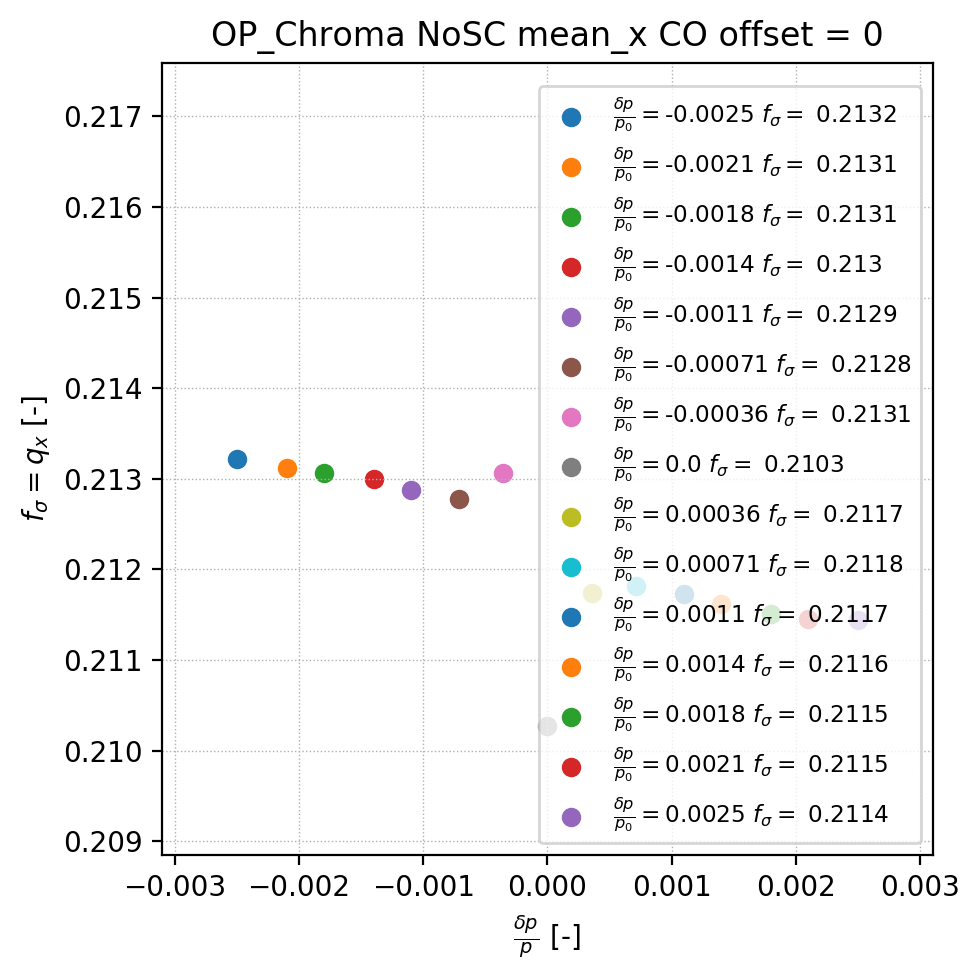

In [25]:
parameter = 'mean_x'
        
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

skiptrns= 6
N_turns = 31 - skiptrns

colors = cm.rainbow(np.linspace(0, 1, len(ddo.keys())))
c_it = int(0)

for key, value in sorted(ddo.iteritems()):    
    y = (ddo[key][parameter][0]-np.mean(ddo[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=N_turns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        lab_ =  r'$\frac{\delta p}{p_0}=$' + str(key) + ' $f_\sigma = $ '+ str(round(freq,4)) 
        ax1.scatter(float(key), freq, label=str(lab_))
    except IndexError:
        continue 
        
    f_sig_x.append(freq)
    qx_naff.append(freq)
    
ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_naff.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

# Compare different calculated tunes

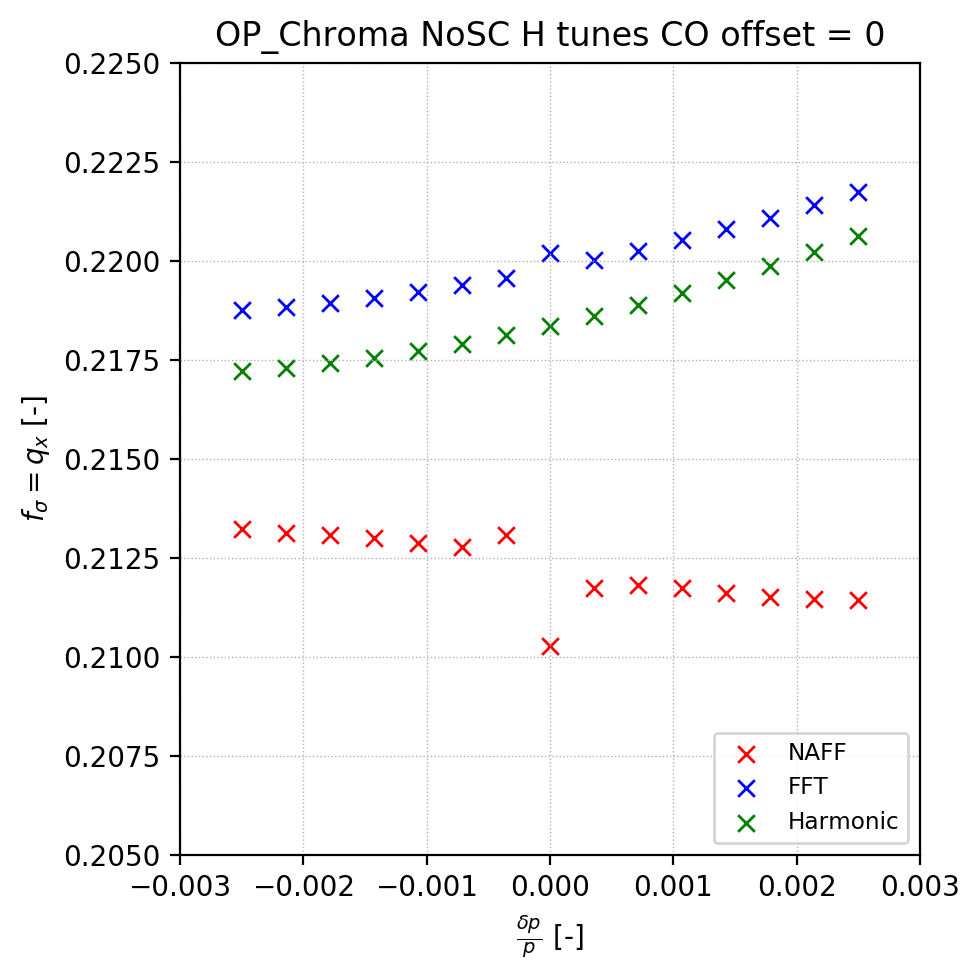

In [29]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' H tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3E-3,3E-3);
ax1.set_ylim(0.205, 0.225);

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ax1.scatter(dps, qx_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qx_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

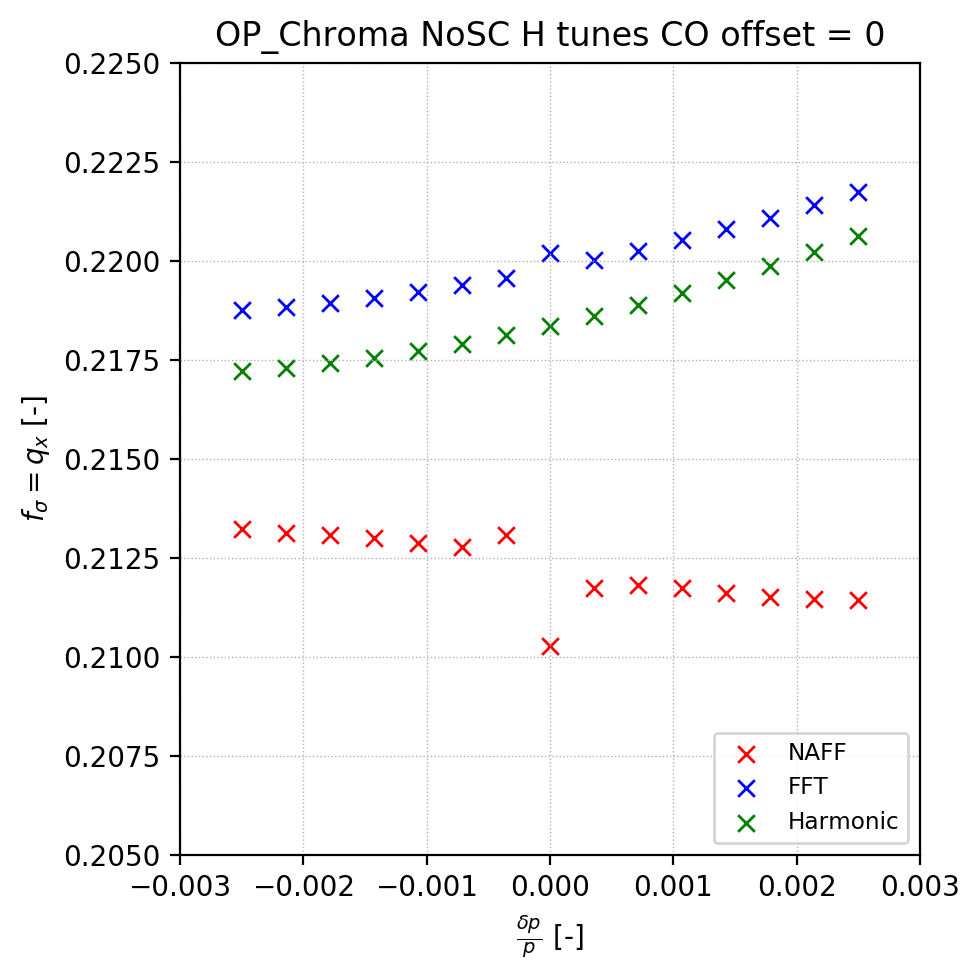

In [31]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' H tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_x$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3E-3,3E-3);
ax1.set_ylim(0.205, 0.225);

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

popt_h, pcov_h = curve_fit(line, dps, qx_harmonic)
popt_f, pcov_f = curve_fit(line, dps, qx_fft)
popt_n, pcov_n = curve_fit(line, dps, qx_naff)

ax1.scatter(dps, qx_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qx_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qx_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qx_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

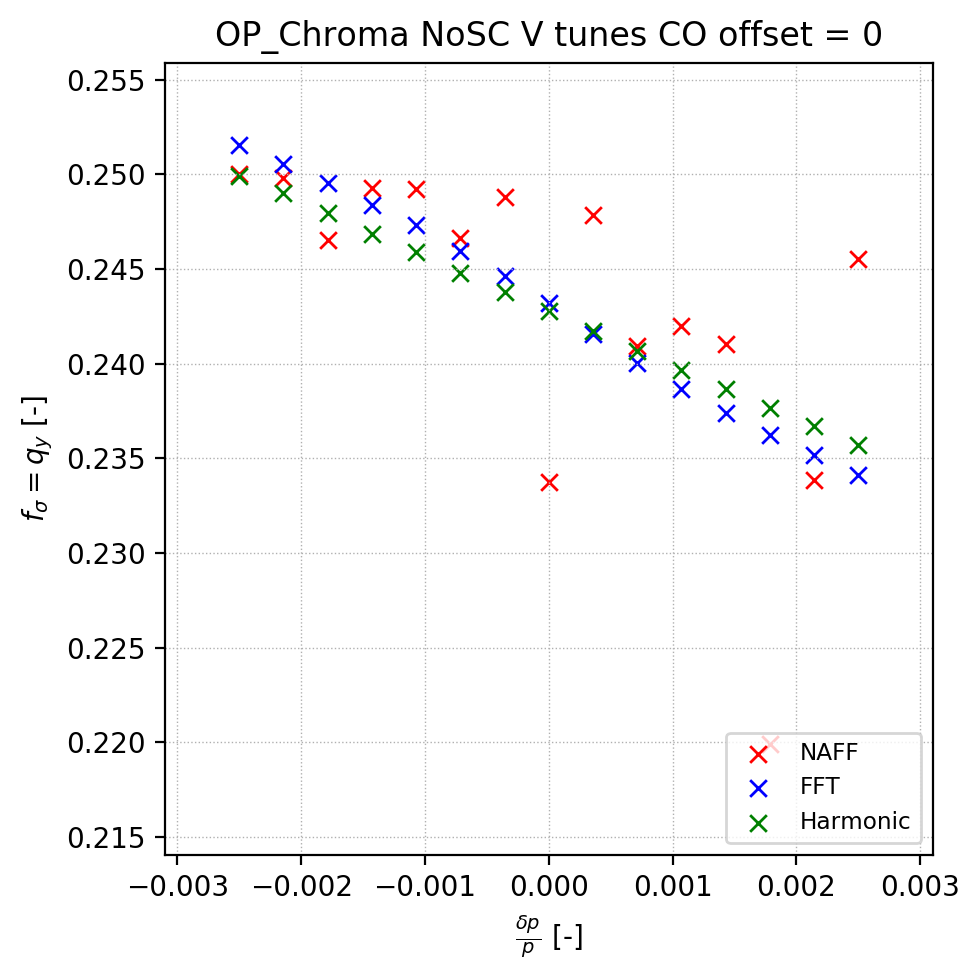

In [27]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' V tunes CO offset = ' + CO_offset
ax1.set_title(tit);

ax1.set_ylabel(r'$f_{\sigma} = q_y$ [-]');
ax1.set_xlabel(r'$\frac{\delta p}{p}$ [-]');

ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(-3.1E-3,3.1E-3);
#ax1.set_ylim(0.205, 0.225);

dps = np.linspace(-2.5E-3, 2.5E-3, num_sims)

ax1.scatter(dps, qy_naff, label='NAFF', color='r', marker='x');
ax1.scatter(dps, qy_fft, label='FFT', color='b', marker='x');
ax1.scatter(dps, qy_harmonic, label='Harmonic', color='g', marker='x');

ax1.legend(fontsize='small', loc=4)
ax1.grid(lw=0.5, ls=':')

savename = save_folder + 'qy_cf.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);